<a href="https://colab.research.google.com/github/Nandakishor999/FMML_MODULE/blob/main/FMML_2024_Module_04_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Foundations of Modern Machine Learning, IIIT Hyderabad

Project: Perceptron and Gradient Descent

Note: Please write the code for the following tasks in separate code cells.  


# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

### Example 1 - A simple cost function

#### $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x ** 2 + x + 1

In [3]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

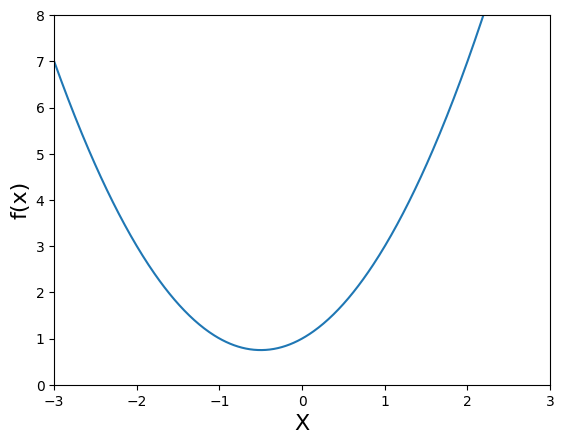

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2 * x + 1

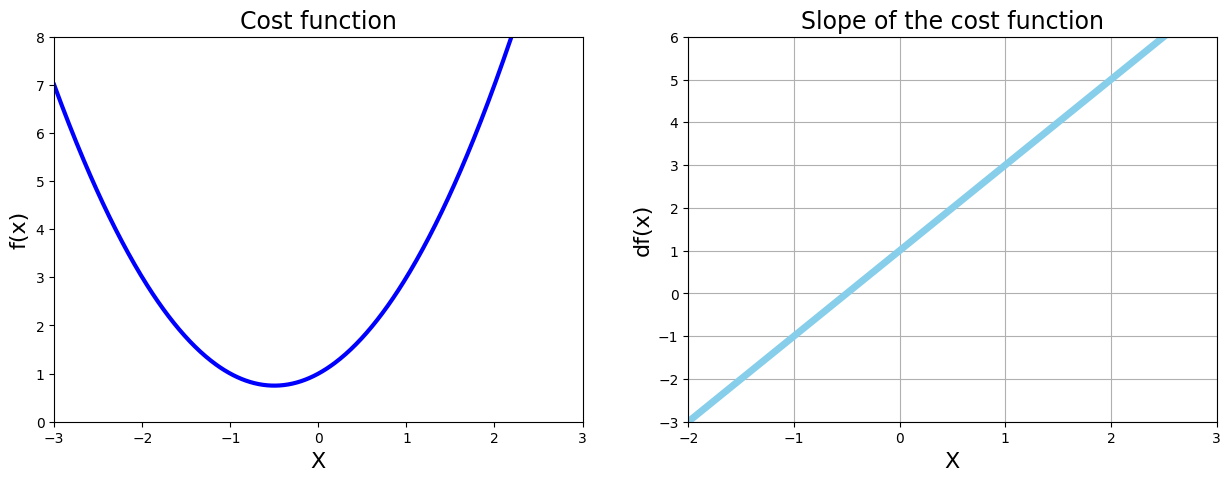

In [6]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

### Gradient Descent

In [12]:
# Gradient Descent

# Function definitions (assuming the function and its derivative are defined):
# f(x) represents the cost function.
# df(x) represents the derivative of the cost function.

# Example:
def f(x):
    return x**2 + 4*x + 4  # Example cost function: f(x) = x^2 + 4x + 4

def df(x):
    return 2*x + 4  # Derivative of f(x) = 2x + 4

# Gradient Descent Algorithm
new_x = 3  # Initial guess for x
previous_x = 0  # Previous x value to track change
step_multiplier = 0.1  # Step size (learning rate)
precision = 0.00001  # Precision for stopping criterion

x_list = [new_x]  # To keep track of x values
slope_list = [df(new_x)]  # To keep track of derivative (slope) values

for n in range(500):
    previous_x = new_x  # Save the previous x value
    gradient = df(new_x)  # Compute the gradient (derivative)
    new_x = new_x - step_multiplier * gradient  # Update x in the opposite direction of the gradient

    step_size = abs(new_x - previous_x)  # Calculate the step size

    x_list.append(new_x)  # Append the new x value to the list
    slope_list.append(df(new_x))  # Append the new gradient value to the list

    # Check if the change in x is smaller than the desired precision
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

# Output results
print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))


Loop ran this many times: 52
Local minimum occurs at: -1.9999634624590668
Slope or df(x) value at this point is: 7.307508186649159e-05
f(x) value or cost at this point is: 1.334992116852618e-09


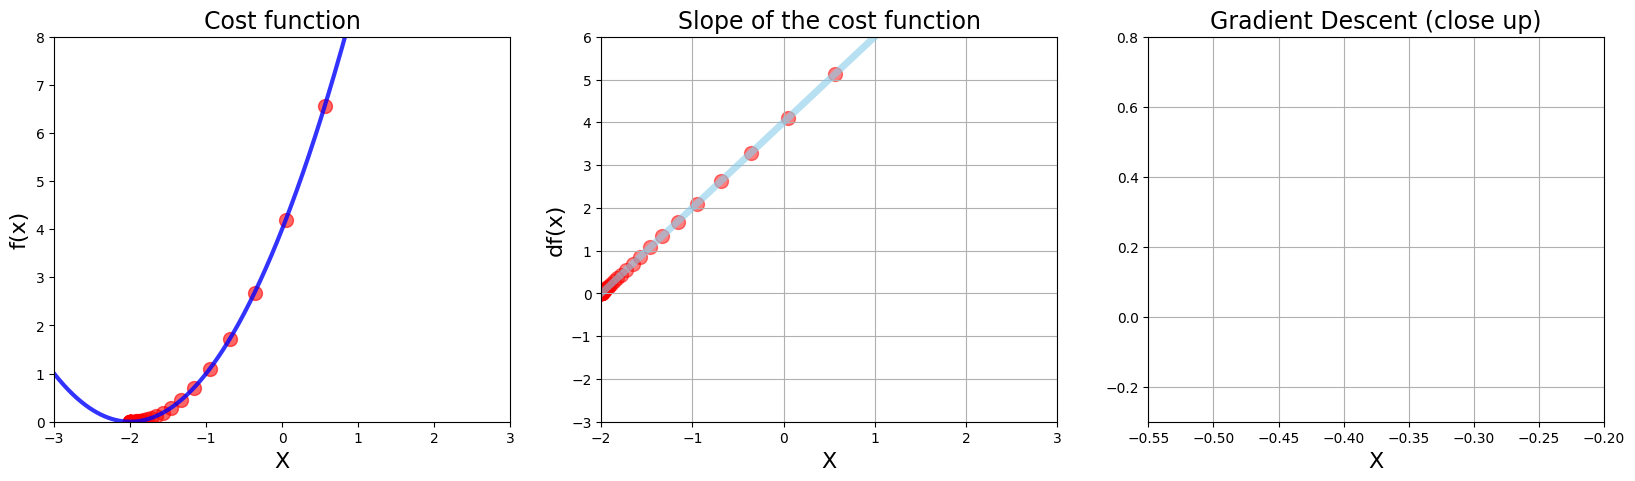

In [13]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

#### $$g(x) = x^4 - 4x^2 + 5$$

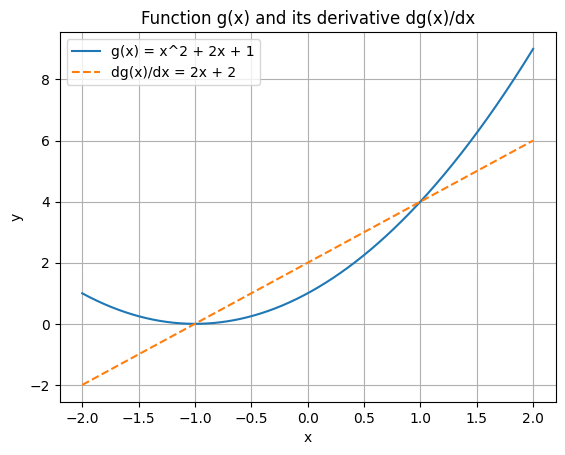

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Make some data
x_2 = np.linspace(-2, 2, 1000)  # Generate 1000 points between -2 and 2

# Define the function g(x)
def g(x):
    return x**2 + 2*x + 1  # Example function: g(x) = x^2 + 2x + 1

# Define the derivative of the function dg(x)
def dg(x):
    return 2*x + 2  # Derivative: dg(x) = 2x + 2

# Optional: Plotting the function and its derivative for visualization
plt.plot(x_2, g(x_2), label='g(x) = x^2 + 2x + 1')
plt.plot(x_2, dg(x_2), label="dg(x)/dx = 2x + 2", linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function g(x) and its derivative dg(x)/dx')
plt.grid(True)
plt.show()


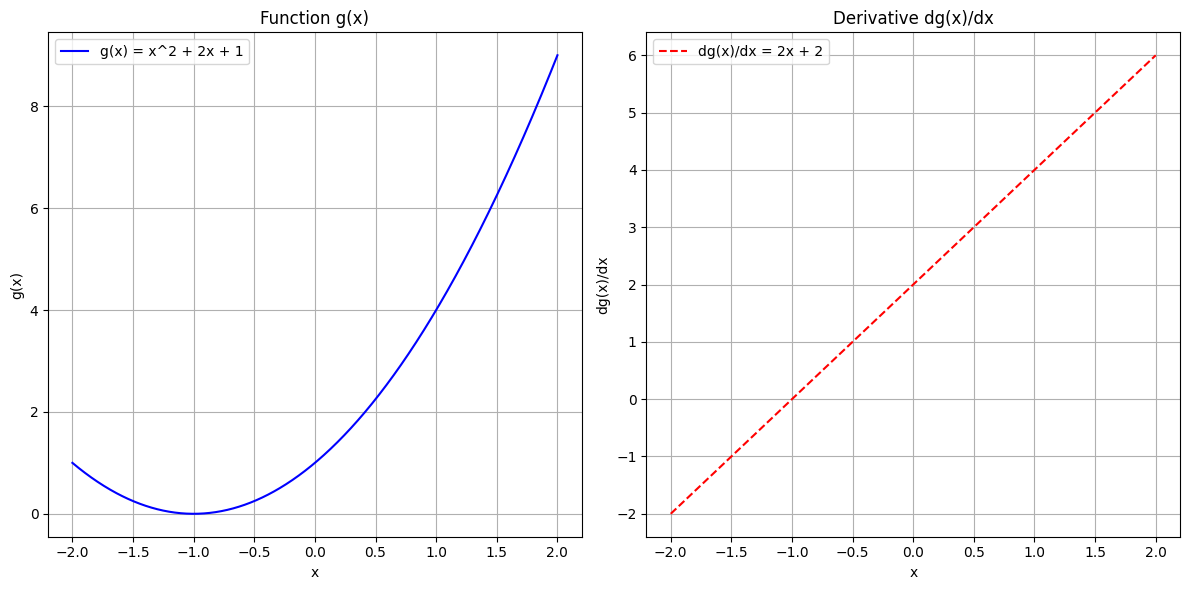

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Make some data
x_2 = np.linspace(-2, 2, 1000)  # Generate 1000 points between -2 and 2

# Define the function g(x)
def g(x):
    return x**2 + 2*x + 1  # Example function: g(x) = x^2 + 2x + 1

# Define the derivative of the function dg(x)
def dg(x):
    return 2*x + 2  # Derivative: dg(x) = 2x + 2

# Plotting side by side

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create 1 row, 2 columns for side-by-side plots

# Plot the function g(x) on the first subplot
axes[0].plot(x_2, g(x_2), label='g(x) = x^2 + 2x + 1', color='b')
axes[0].set_title('Function g(x)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('g(x)')
axes[0].grid(True)
axes[0].legend()

# Plot the derivative dg(x) on the second subplot
axes[1].plot(x_2, dg(x_2), label="dg(x)/dx = 2x + 2", color='r', linestyle='--')
axes[1].set_title('Derivative dg(x)/dx')
axes[1].set_xlabel('x')
axes[1].set_ylabel('dg(x)/dx')
axes[1].grid(True)
axes[1].legend()

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


## Gradient Descent

In [16]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [17]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.9766784705183262
Number of steps: 103


In [18]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.9951051280185935
Number of steps: 230


In [19]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.9762106678542721
Number of steps: 90


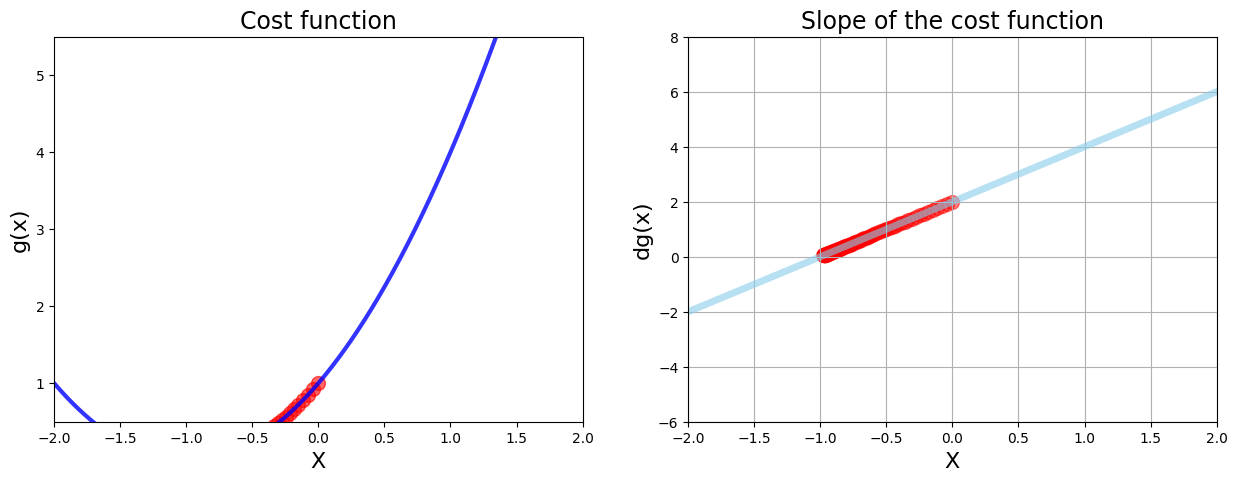

In [20]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

### Example 3 - Divergence and Overflow

#### $$h(x) = x^5 - 2x^4 + 2$$

Loop ran this many times: 51
Local minimum occurs at: -0.9999634624590668
Slope or dg(x)/dx value at this point is: 7.307508186649159e-05
g(x) value at this point is: 1.334991894808013e-09


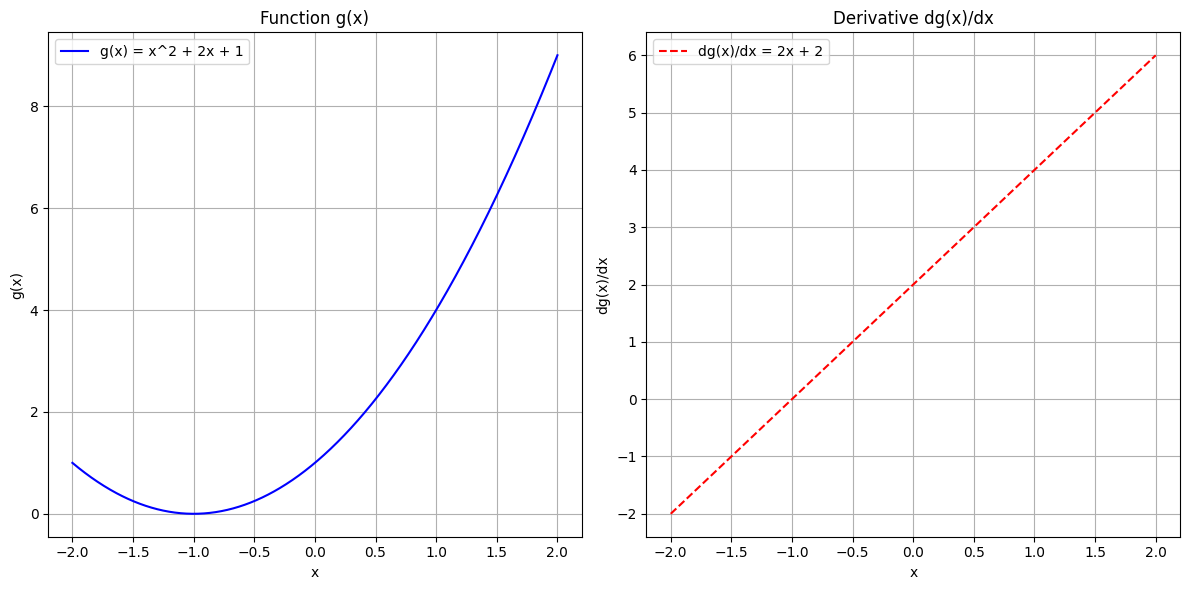

In [21]:
## TASK-4 : Code the same things as they were done for the first two examples
import numpy as np
import matplotlib.pyplot as plt

# Task 4: Gradient Descent and Plotting Function & Derivative

# Generate some data for x values
x_2 = np.linspace(-2, 2, 1000)

# Define the function g(x) and its derivative dg(x)
def g(x):
    return x**2 + 2*x + 1  # Function g(x) = x^2 + 2x + 1

def dg(x):
    return 2*x + 2  # Derivative of g(x): dg(x)/dx = 2x + 2

# Gradient Descent for g(x)
new_x = 3  # Initial guess for x
previous_x = 0  # Previous x value
step_multiplier = 0.1  # Step size or learning rate
precision = 0.00001  # Precision to stop the iteration when the change is small

x_list = [new_x]  # To track x values
slope_list = [dg(new_x)]  # To track the derivative (slope) values

for n in range(500):
    previous_x = new_x  # Save the previous value of x
    gradient = dg(new_x)  # Compute the gradient (derivative)
    new_x = new_x - step_multiplier * gradient  # Update x by moving against the gradient

    step_size = abs(new_x - previous_x)  # Compute the step size

    x_list.append(new_x)  # Append the new x value to the list
    slope_list.append(dg(new_x))  # Append the new gradient value to the list

    # Stop the loop if the change is smaller than the desired precision
    if step_size < precision:
        print('Loop ran this many times:', n)
        break

# Output results of gradient descent
print('Local minimum occurs at:', new_x)
print('Slope or dg(x)/dx value at this point is:', dg(new_x))
print('g(x) value at this point is:', g(new_x))

# Plotting side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Create 1 row, 2 columns for side-by-side plots

# Plot the function g(x) on the first subplot
axes[0].plot(x_2, g(x_2), label='g(x) = x^2 + 2x + 1', color='b')
axes[0].set_title('Function g(x)')
axes[0].set_xlabel('x')
axes[0].set_ylabel('g(x)')
axes[0].grid(True)
axes[0].legend()

# Plot the derivative dg(x) on the second subplot
axes[1].plot(x_2, dg(x_2), label="dg(x)/dx = 2x + 2", color='r', linestyle='--')
axes[1].set_title('Derivative dg(x)/dx')
axes[1].set_xlabel('x')
axes[1].set_ylabel('dg(x)/dx')
axes[1].grid(True)
axes[1].legend()

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


#### Learning Rate

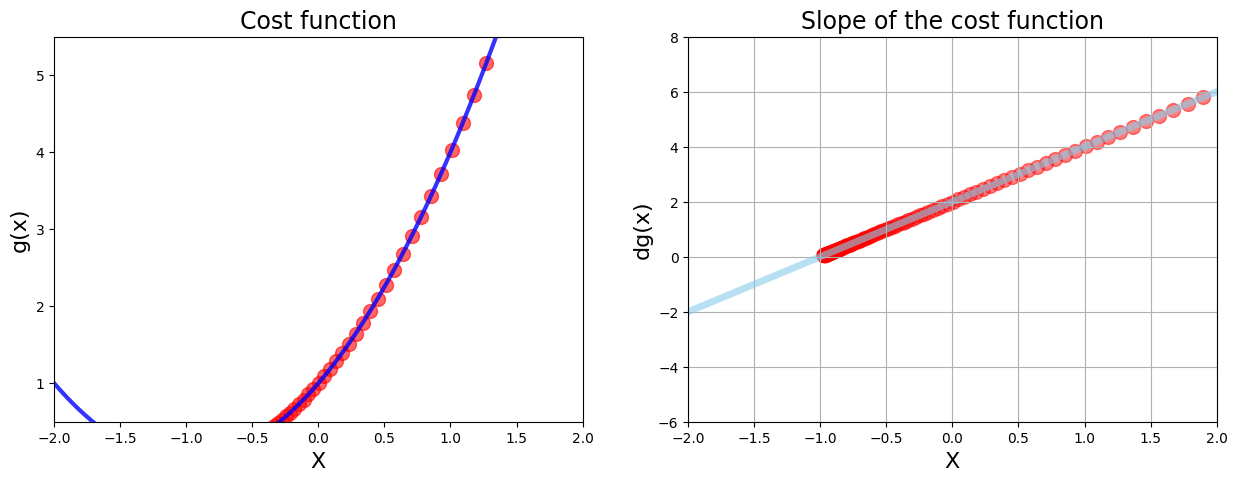

Number of steps is:  119


In [22]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

Converged after 15 iterations


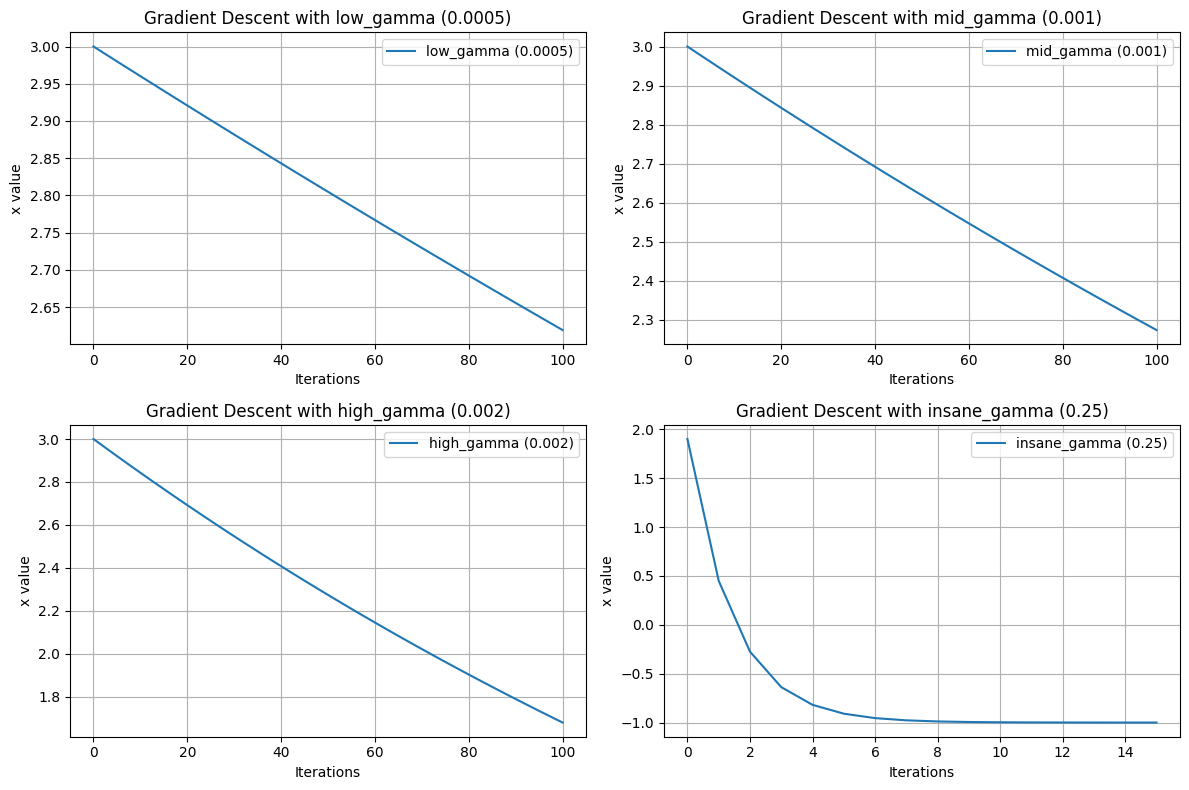

In [25]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)
n = 100

import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x) and its derivative dg(x)
def g(x):
    return x**2 + 2*x + 1  # Function: g(x) = x^2 + 2x + 1

def dg(x):
    return 2*x + 2  # Derivative: dg(x)/dx = 2x + 2

# Gradient Descent Function
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    new_x = initial_guess
    previous_x = 0
    x_list = [new_x]  # To track the x values
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(new_x)  # Compute the gradient
        new_x = new_x - multiplier * gradient  # Update the value of x

        step_size = abs(new_x - previous_x)  # Calculate the step size
        x_list.append(new_x)

        if step_size < precision:  # Stop if the step size is smaller than the precision
            print(f"Converged after {n+1} iterations")
            break
    return x_list

# Set the number of iterations for gradient descent
n = 100

# Run gradient descent with low_gamma (0.0005)
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

# Run gradient descent with mid_gamma (0.001)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)

# Run gradient descent with high_gamma (0.002)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)

# Run gradient descent with insane_gamma (0.25)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)

# Plot the results for all learning rates
plt.figure(figsize=(12, 8))

# Plot for low_gamma (0.0005)
plt.subplot(2, 2, 1)
plt.plot(low_gamma, label='low_gamma (0.0005)')
plt.title('Gradient Descent with low_gamma (0.0005)')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.grid(True)

# Plot for mid_gamma (0.001)
plt.subplot(2, 2, 2)
plt.plot(mid_gamma, label='mid_gamma (0.001)')
plt.title('Gradient Descent with mid_gamma (0.001)')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.grid(True)

# Plot for high_gamma (0.002)
plt.subplot(2, 2, 3)
plt.plot(high_gamma, label='high_gamma (0.002)')
plt.title('Gradient Descent with high_gamma (0.002)')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.grid(True)

# Plot for insane_gamma (0.25)
plt.subplot(2, 2, 4)
plt.plot(insane_gamma, label='insane_gamma (0.25)')
plt.title('Gradient Descent with insane_gamma (0.25)')
plt.xlabel('Iterations')
plt.ylabel('x value')
plt.legend()
plt.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


Converged after 15 iterations


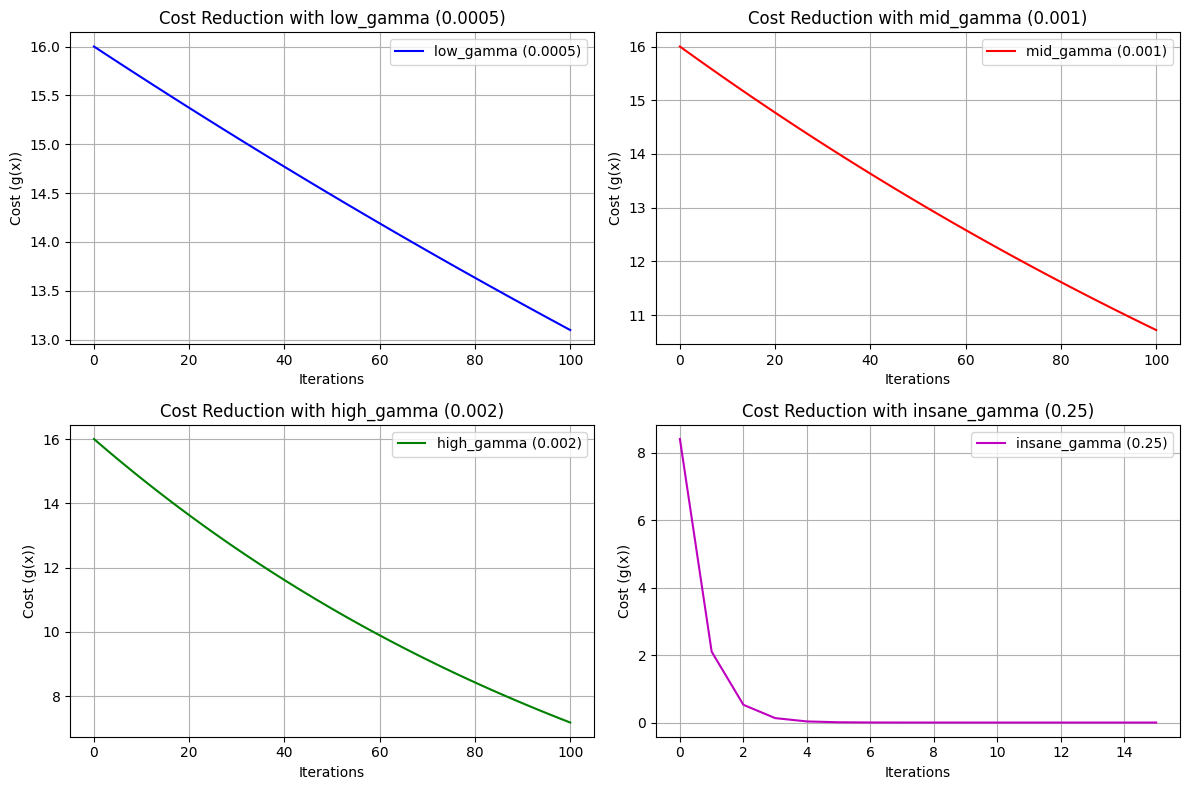

In [27]:
## TASK-7 : Plot reduction in cost for each iteration
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x) and its derivative dg(x)
def g(x):
    return x**2 + 2*x + 1  # Function: g(x) = x^2 + 2x + 1

def dg(x):
    return 2*x + 2  # Derivative: dg(x)/dx = 2x + 2

# Gradient Descent Function (modified to track cost reduction)
def gradient_descent(derivative_func, cost_func, initial_guess, multiplier, precision, max_iter):
    new_x = initial_guess
    previous_x = 0
    x_list = [new_x]  # To track the x values
    cost_list = [cost_func(new_x)]  # To track the cost values

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(new_x)  # Compute the gradient
        new_x = new_x - multiplier * gradient  # Update the value of x

        step_size = abs(new_x - previous_x)  # Calculate the step size
        cost_list.append(cost_func(new_x))  # Track the cost after each update

        if step_size < precision:  # Stop if the step size is smaller than the precision
            print(f"Converged after {n+1} iterations")
            break

    return x_list, cost_list

# Set the number of iterations for gradient descent
n = 100

# Run gradient descent with low_gamma (0.0005) and track cost reduction
low_gamma_x, low_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=3,
                                               multiplier=0.0005, precision=0.0001, max_iter=n)

# Run gradient descent with mid_gamma (0.001) and track cost reduction
mid_gamma_x, mid_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=3,
                                               multiplier=0.001, precision=0.0001, max_iter=n)

# Run gradient descent with high_gamma (0.002) and track cost reduction
high_gamma_x, high_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Run gradient descent with insane_gamma (0.25) and track cost reduction
insane_gamma_x, insane_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=1.9,
                                                    multiplier=0.25, precision=0.0001, max_iter=n)

# Plot the reduction in cost for each iteration
plt.figure(figsize=(12, 8))

# Plot for low_gamma (0.0005)
plt.subplot(2, 2, 1)
plt.plot(low_gamma_cost, label='low_gamma (0.0005)', color='b')
plt.title('Cost Reduction with low_gamma (0.0005)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Plot for mid_gamma (0.001)
plt.subplot(2, 2, 2)
plt.plot(mid_gamma_cost, label='mid_gamma (0.001)', color='r')
plt.title('Cost Reduction with mid_gamma (0.001)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Plot for high_gamma (0.002)
plt.subplot(2, 2, 3)
plt.plot(high_gamma_cost, label='high_gamma (0.002)', color='g')
plt.title('Cost Reduction with high_gamma (0.002)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Plot for insane_gamma (0.25)
plt.subplot(2, 2, 4)
plt.plot(insane_gamma_cost, label='insane_gamma (0.25)', color='m')
plt.title('Cost Reduction with insane_gamma (0.25)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


### Example 4 - Data Viz with 3D Charts

#### Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

Converged after 15 iterations


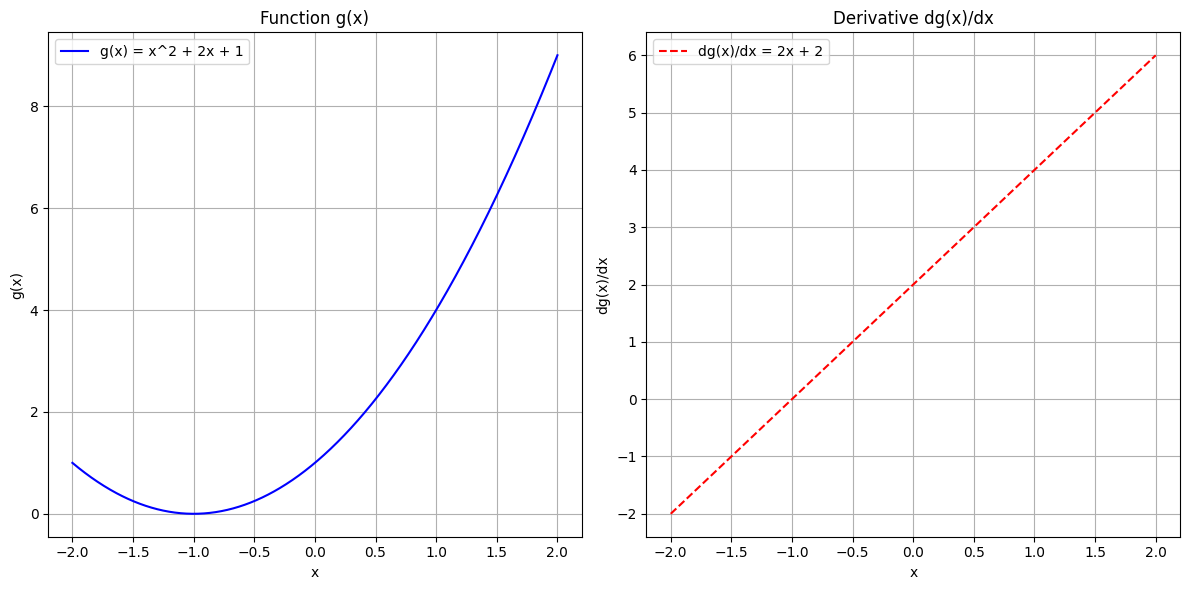

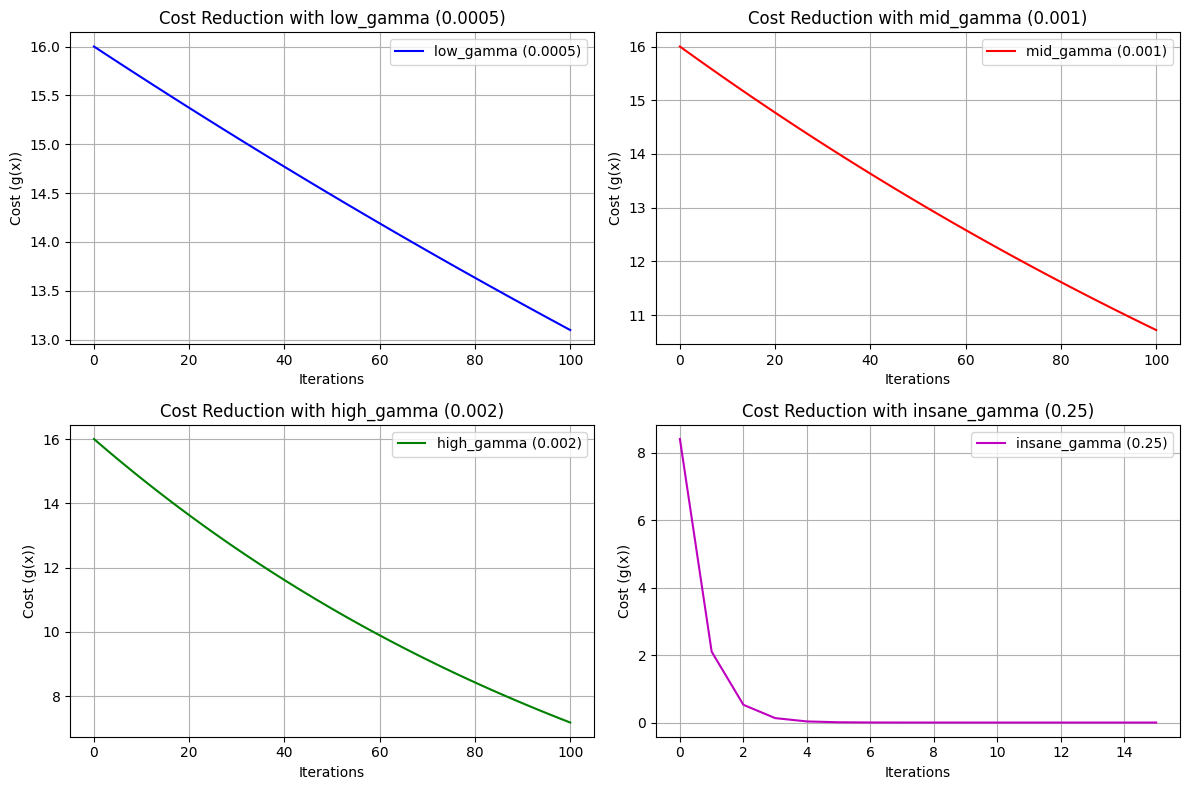

In [28]:
## TASK-8 : Code the same things as they were done for the first two examples
import numpy as np
import matplotlib.pyplot as plt

# Define the function g(x) and its derivative dg(x)
def g(x):
    return x**2 + 2*x + 1  # Function: g(x) = x^2 + 2x + 1

def dg(x):
    return 2*x + 2  # Derivative: dg(x)/dx = 2x + 2

# Gradient Descent Function (modified to track cost reduction)
def gradient_descent(derivative_func, cost_func, initial_guess, multiplier, precision, max_iter):
    new_x = initial_guess
    previous_x = 0
    x_list = [new_x]  # To track the x values
    cost_list = [cost_func(new_x)]  # To track the cost values

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(new_x)  # Compute the gradient
        new_x = new_x - multiplier * gradient  # Update the value of x

        step_size = abs(new_x - previous_x)  # Calculate the step size
        cost_list.append(cost_func(new_x))  # Track the cost after each update

        if step_size < precision:  # Stop if the step size is smaller than the precision
            print(f"Converged after {n+1} iterations")
            break

    return x_list, cost_list

# Set the number of iterations for gradient descent
n = 100

# Run gradient descent with low_gamma (0.0005) and track cost reduction
low_gamma_x, low_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=3,
                                               multiplier=0.0005, precision=0.0001, max_iter=n)

# Run gradient descent with mid_gamma (0.001) and track cost reduction
mid_gamma_x, mid_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=3,
                                               multiplier=0.001, precision=0.0001, max_iter=n)

# Run gradient descent with high_gamma (0.002) and track cost reduction
high_gamma_x, high_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=3,
                                                multiplier=0.002, precision=0.0001, max_iter=n)

# Run gradient descent with insane_gamma (0.25) and track cost reduction
insane_gamma_x, insane_gamma_cost = gradient_descent(derivative_func=dg, cost_func=g, initial_guess=1.9,
                                                    multiplier=0.25, precision=0.0001, max_iter=n)

# Plot the function g(x) and its derivative dg(x)/dx side by side
x_2 = np.linspace(-2, 2, 1000)

plt.figure(figsize=(12, 6))

# Plot the function g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), label='g(x) = x^2 + 2x + 1', color='b')
plt.title('Function g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.legend()

# Plot the derivative dg(x)/dx
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), label="dg(x)/dx = 2x + 2", color='r', linestyle='--')
plt.title('Derivative dg(x)/dx')
plt.xlabel('x')
plt.ylabel('dg(x)/dx')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Plot the reduction in cost for each iteration
plt.figure(figsize=(12, 8))

# Plot for low_gamma (0.0005)
plt.subplot(2, 2, 1)
plt.plot(low_gamma_cost, label='low_gamma (0.0005)', color='b')
plt.title('Cost Reduction with low_gamma (0.0005)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Plot for mid_gamma (0.001)
plt.subplot(2, 2, 2)
plt.plot(mid_gamma_cost, label='mid_gamma (0.001)', color='r')
plt.title('Cost Reduction with mid_gamma (0.001)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Plot for high_gamma (0.002)
plt.subplot(2, 2, 3)
plt.plot(high_gamma_cost, label='high_gamma (0.002)', color='g')
plt.title('Cost Reduction with high_gamma (0.002)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Plot for insane_gamma (0.25)
plt.subplot(2, 2, 4)
plt.plot(insane_gamma_cost, label='insane_gamma (0.25)', color='m')
plt.title('Cost Reduction with insane_gamma (0.25)')
plt.xlabel('Iterations')
plt.ylabel('Cost (g(x))')
plt.legend()
plt.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


In [29]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


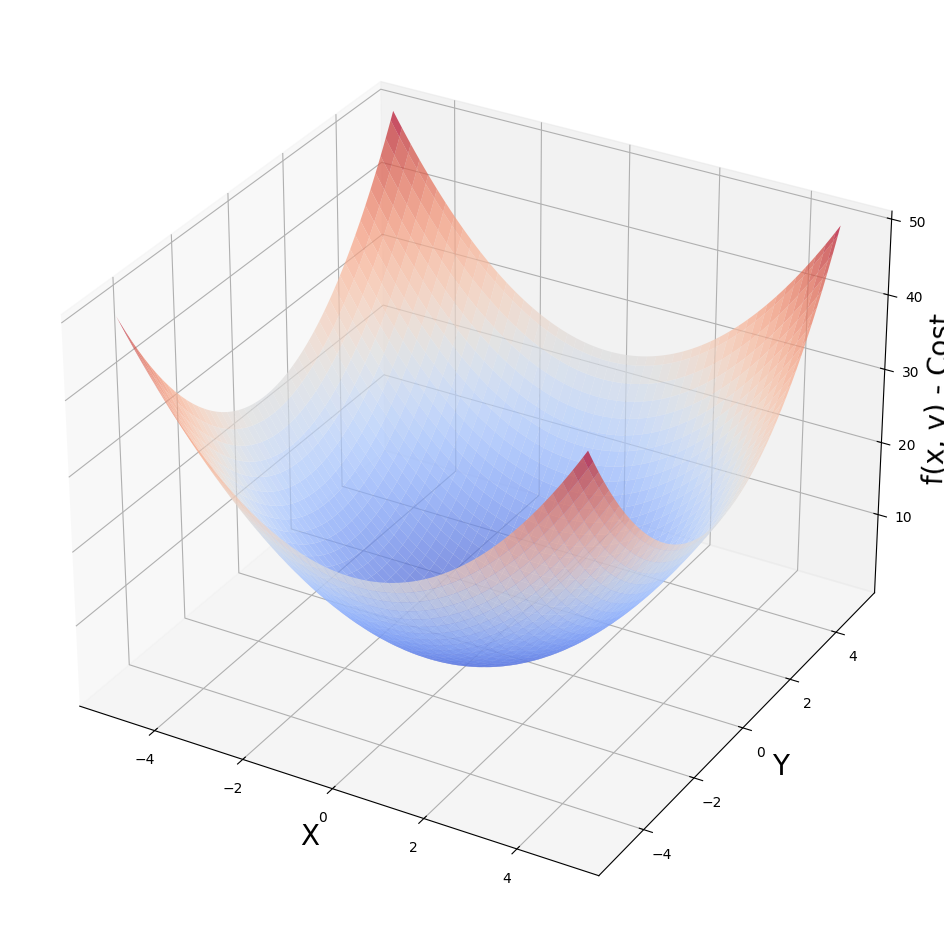

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the function f(x, y)
def f(x, y):
    return x**2 + y**2  # Example: A simple paraboloid function

# Create meshgrid for x and y values
x_4 = np.linspace(-5, 5, 100)  # X values ranging from -5 to 5
y_4 = np.linspace(-5, 5, 100)  # Y values ranging from -5 to 5

X, Y = np.meshgrid(x_4, y_4)  # Create a grid of X, Y values
Z = f(X, Y)  # Compute the Z values using the function f(x, y)

# Create the 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.7)

# Show the plot
plt.show()


### TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.


#### Partial Derivatives & Symbolic Computation

#### $$\frac{\partial f}{\partial x} = ## [REQUIRED]

#### $$\frac{\partial f}{\partial y} = ## [REQUIRED]

In [32]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  x**2 + y**2
Partial derivative wrt x is:  2*y
Value of f(x,y) at x=1.8 y=1.0 is:  4.24000000000000
Value of partial derivative wrt x:  3.60000000000000


#### Batch Gradient Descent with SymPy

*   List item
*   List item



In [33]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979496953e-48 8.76866552760853e-49]
Minimum occurs at x value of:  6.31343917987813e-49
Minimum occurs at y value of:  3.50746621104341e-49
The cost is:  5.21618334996315e-97


In [34]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return 2 * x  # Partial derivative of f(x, y) = x^2 + y^2 with respect to x

def fpy(x, y):
    return 2 * y  # Partial derivative of f(x, y) = x^2 + y^2 with respect to y


In [35]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of:  6.313439179878134e-49
Minimum occurs at y value of:  3.507466211043411e-49
The cost is:  5.216183349963152e-97




```
#### This is formatted as code
```

### Graphing 3D Gradient Descent

In [36]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20
The cost is:  7.300635289507557e-39


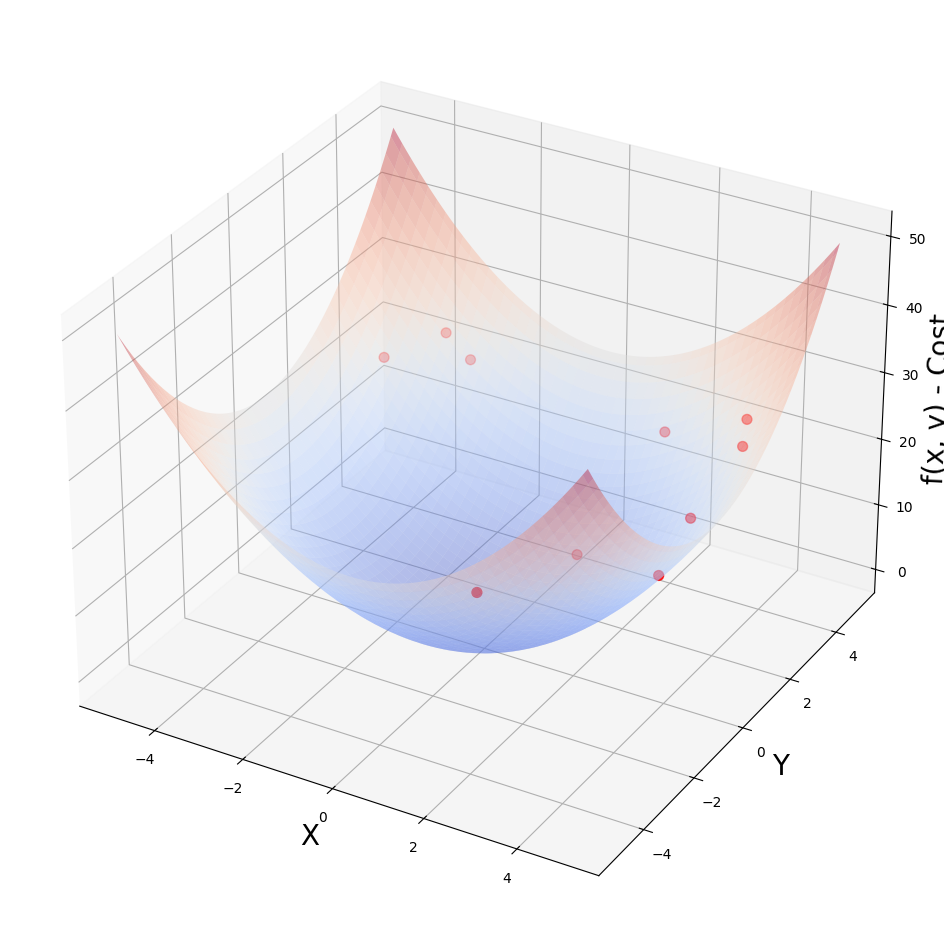

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the function f(x, y)
def f(x, y):
    return x**2 + y**2  # Example function: f(x, y) = x^2 + y^2

# Create meshgrid for x and y values
x_4 = np.linspace(-5, 5, 100)  # X values ranging from -5 to 5
y_4 = np.linspace(-5, 5, 100)  # Y values ranging from -5 to 5

X, Y = np.meshgrid(x_4, y_4)  # Create a grid of X, Y values
Z = f(X, Y)  # Compute the Z values using the function f(x, y)

# Example of some values_array (random points on the surface)
values_array = np.random.uniform(-5, 5, (10, 2))  # Random points in the range [-5, 5]
values_array[:, 1] = np.random.uniform(-5, 5, 10)  # Generate random points in the y-dimension

# Create the 3D plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Set labels
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

# Plot the surface
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.4)

# Scatter plot for values_array points
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

# Show the plot
plt.show()


#### For Reference, practice and play with the code below

### Example 5 - Working with data & a real cost function

#### Mean Squared Error: a cost function for regression problems

#### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
#### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [39]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [40]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029545
Theta 1: 1.2227264637835913


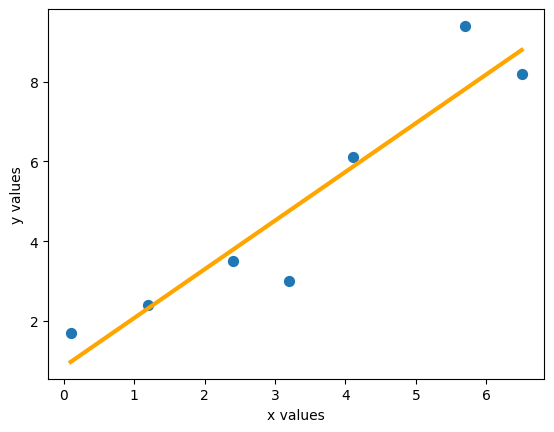

In [41]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [42]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [45]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

import numpy as np

def mse(y, y_hat):
    # Calculate the mean squared error
    mse_calc = np.mean((y - y_hat)**2)
    return mse_calc

# Example usage:
# Assuming y (true values) and y_hat (predicted values) are numpy arrays

y = np.array([3, -0.5, 2, 7])  # Example true values
y_hat = np.array([2.5, 0.0, 2, 8])  # Example predicted values

# Call the mse function and print the result
mse_value = mse(y, y_hat)
print(f'Mean Squared Error: {mse_value}')



Mean Squared Error: 0.375


In [47]:

import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# Define the manually calculated MSE function
def mse(y, y_hat):
    mse_calc = np.mean((y - y_hat)**2)  # Calculate the mean squared error manually
    return mse_calc

# Example true values (y_5) and predicted values (y_hat)
y_5 = np.array([3, -0.5, 2, 7])  # Example true values
y_hat = np.array([2.5, 0.0, 2, 8])  # Example predicted values

# Example: Using a regression model for predictions
# Simulate some feature data (x_5) for regression
x_5 = np.array([[1], [2], [3], [4]])  # Example feature data (reshape if necessary)

# Create a simple linear regression model and fit it
regr = LinearRegression()
regr.fit(x_5, y_5)  # Fit the model to the data

# Manually calculate MSE using the mse function
manual_mse = mse(y_5, y_hat)

# Calculate MSE using mean_squared_error from sklearn
mse_regression = mean_squared_error(y_5, regr.predict(x_5))

# Print the results
print('Manually calculated MSE is:', manual_mse)
print('MSE regression using mean_squared_error is:', mse_regression)


Manually calculated MSE is: 0.375
MSE regression using mean_squared_error is: 4.66875


#### 3D Plot for the MSE Cost Function

#### Make data for thetas

In [48]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


#### Calc MSE using nested for loops

In [49]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


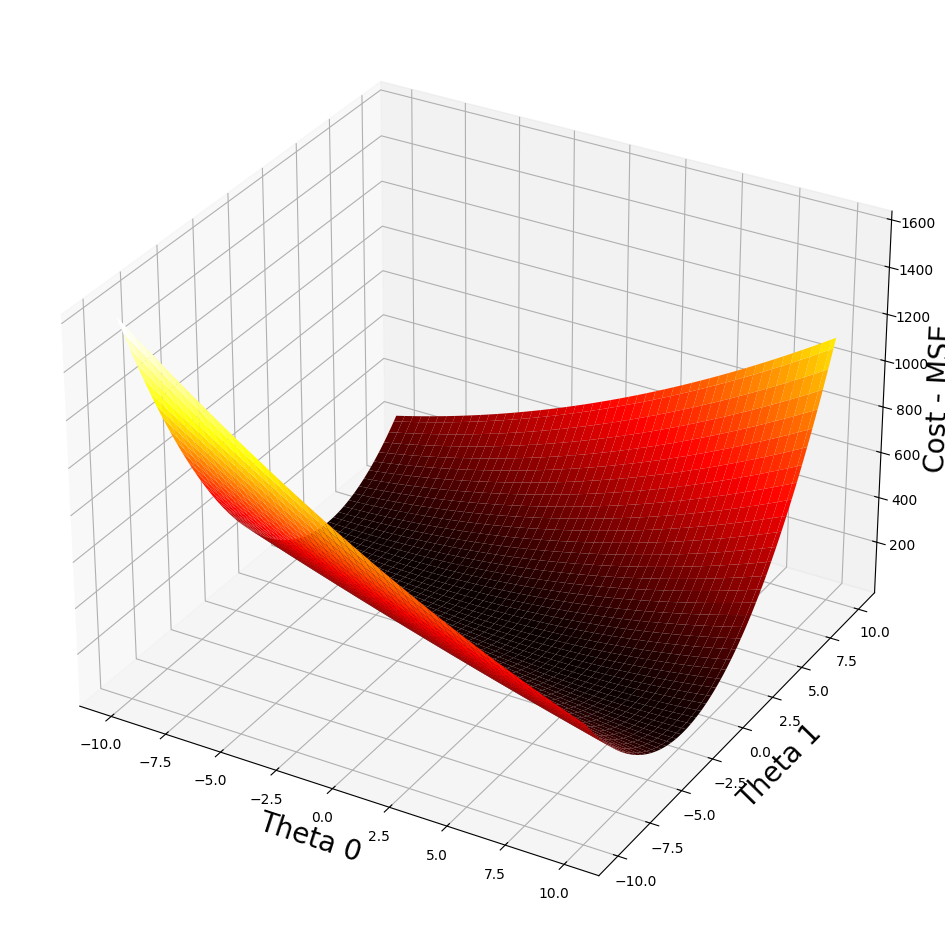

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Example data: true values and predictions
y = np.array([3, -0.5, 2, 7])  # True values (output)
X = np.array([1, 2, 3, 4])     # Feature values (input)
y_hat = np.array([2.5, 0.0, 2, 8])  # Predicted values (model output)

# Define MSE function
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

# Grid for Theta 0 and Theta 1 (theta values)
theta_0_range = np.linspace(-10, 10, 100)  # Range for Theta 0
theta_1_range = np.linspace(-10, 10, 100)  # Range for Theta 1

# Create meshgrid for plotting
plot_t0, plot_t1 = np.meshgrid(theta_0_range, theta_1_range)

# Compute the MSE cost function for each combination of theta values
plot_cost = np.zeros_like(plot_t0)

for i in range(len(theta_0_range)):
    for j in range(len(theta_1_range)):
        # For each combination of Theta 0 and Theta 1, compute the predicted values (y_hat)
        theta_0 = plot_t0[i, j]
        theta_1 = plot_t1[i, j]
        y_hat_model = theta_0 + theta_1 * X  # Linear regression model
        plot_cost[i, j] = mse(y, y_hat_model)  # Calculate the MSE for the current model

# Plotting the cost surface (MSE surface)
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

# Labels for the axes
ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

# Plot the surface
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)

# Show the plot
plt.show()


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Example data: true values and predictions
y = np.array([3, -0.5, 2, 7])  # True values (output)
X = np.array([1, 2, 3, 4])     # Feature values (input)

# Define MSE function
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

# Grid for Theta 0 and Theta 1 (theta values)
theta_0_range = np.linspace(-10, 10, 100)  # Range for Theta 0
theta_1_range = np.linspace(-10, 10, 100)  # Range for Theta 1

# Create meshgrid for plotting
plot_t0, plot_t1 = np.meshgrid(theta_0_range, theta_1_range)

# Compute the MSE cost function for each combination of theta values
plot_cost = np.zeros_like(plot_t0)

for i in range(len(theta_0_range)):
    for j in range(len(theta_1_range)):
        # For each combination of Theta 0 and Theta 1, compute the predicted values (y_hat)
        theta_0 = plot_t0[i, j]
        theta_1 = plot_t1[i, j]
        y_hat_model = theta_0 + theta_1 * X  # Linear regression model
        plot_cost[i, j] = mse(y, y_hat_model)  # Calculate the MSE for the current model

# Print the minimum MSE and corresponding Theta values
print('Min value of plot_cost:', plot_cost.min())  # Minimum MSE

# Find the indices of the minimum cost
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)

# Print the corresponding values of Theta 0 and Theta 1 at the minimum
print('Min MSE for Theta 0 at plot_t0[{}][{}]:'.format(ij_min[0], ij_min[1]), plot_t0[ij_min])
print('Min MSE for Theta 1 at plot_t1[{}][{}]:'.format(ij_min[0], ij_min[1]), plot_t1[ij_min])


Min value of plot_cost: 4.674070247933884
Min occurs at (i,j): (57, 45)
Min MSE for Theta 0 at plot_t0[57][45]: -0.9090909090909101
Min MSE for Theta 1 at plot_t1[57][45]: 1.5151515151515156


#### Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

#### $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

#### $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

#### MSE & Gradient Descent

In [55]:
import numpy as np

def grad(x, y, thetas):
    n = y.size  # The number of data points (size of y)

    # Calculate the partial derivatives for theta0 and theta1
    # theta0_slope: Derivative with respect to theta0 (intercept)
    theta0_slope = (-2/n) * np.sum(y - (thetas[0] + thetas[1] * x))

    # theta1_slope: Derivative with respect to theta1 (slope)
    theta1_slope = (-2/n) * np.sum((y - (thetas[0] + thetas[1] * x)) * x)

    # Return the gradient (slope) for both thetas as a numpy array
    return np.array([theta0_slope, theta1_slope])



In [56]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 2.874994953298184
Min occurs at Theta 1: 1.7164940460401233e-06
MSE is: 7.296875000004254
